# 多模态虚假新闻检测数据集

## 官方信息

本次虚假新闻检测任务中，包含文本和图片两种模态的信息。
### 1)文本数据

- id：新闻id，每条新闻的id均不相同，唯一表征一条新闻；
- content: 新闻的文本内容；
- picture_lists：新闻所包含的图片id，字段为空则代表该新闻没有图片，若有多张图片则按其在文本中出现的顺序以“\t”分割。
- comment_2：新闻的评论(最多两条)，字段为空则代表该新闻没有评论，多条评论则以“\t”分割。
- comment_all：新闻的所有评论，字段为空则代表该新闻没有评论，多条评论则以“\t”分割。
- category: 取值为{疫情，科技，政治，军事，财经商业，社会生活，文体娱乐，医药健康，教育考试}，表示新闻所属的领域；其中，训练集中包含除疫情外的所有领域的新闻，测试集只包含疫情相关的新闻，需要注意的是，疫情分类中的新闻按内容仍然可以被分入其它类别，只是考虑到比赛需要单独列出。
- ncw_ label：取值为{0,1}，0表示需要进行真假判断，1表示不需要进行真假判断。
- fake_ label：取值为{0,1},0表示非虚假新闻，1表示虚假新闻。
- real_ label：取值为{0,1},0表示非真实新闻，1表示真实新闻。


### 2)图片数据
图片文件夹中，每张图片均以“id + 格式后缀”的形式命名，格式后缀包含“.jpg”，“.jpeg”,“.png”等多种形式，格式后缀也可能为空。

**注意**：本赛题不可使用外部数据集。入围团队需提供代码、说明文件等材料供审查。

### 提交要求
参赛者以csv文件格式，提交模型结果到大数据竞赛平台，平台进行在线评分，实时排名。目前平台仅支持单文件提交，即所有提交内容需要放在一个文件中。csv文件字段如下：

![](https://imgkr.cn-bj.ufileos.com/9ab765c9-901b-463d-8147-d5e6f66fca0c.png)

约束：real_prob_label_t+ fake_prob_label_t + ncw_prob_label_t = 1, t={0c,2c,all}。

### 评测标准
评价指标为加权求和的交叉熵，计算方法如下：
![](https://imgkr.cn-bj.ufileos.com/bf0285ec-1636-4a11-a387-ee9a6f84d9cd.png)

websie:https://www.datafountain.cn/competitions/422/datasets

## Exploratory Data Analysis

标签类型3类: 真：real、假：fake、无需真假判断：ncw

In [42]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [139]:
import seaborn as sns

In [157]:
def polt_distribution(df,key,drop_zero =False):
    if drop_zero:
        data = df[df[key]!=0].copy()
    else:
        data = df.copy()
    fig,ax = plt.subplots(1,1,figsize=(6,5))
    sns.distplot(data[data.type =='train'][key],norm_hist=True,hist=False,label='train',ax=ax)
    sns.distplot(data[data.type =='test'][key],norm_hist=True,hist=False,label='test',ax=ax)

In [118]:
def count_len(x):
    if x!='':
        return [len(a) for a in x.split('\t') if a!=''] 
    else:
        return [0]

In [185]:
def labels(real,fake,ncw):
    if real == 1:
        return 'real'
    elif fake == 1:
        return 'fake'
    elif ncw==1:
        return 'ncw'
    else:
        return 'nan'

### 读入数据

In [174]:
train = pd.read_csv('data/train.csv')
train['type'] = 'train'
test = pd.read_csv('data/test_dataset.csv')
test['type'] = 'test'

df = pd.concat([train,test])

df = df.fillna('')

In [175]:
# id 唯一 无重复
df.shape,df.id.nunique()

((53116, 11), 53116)

In [177]:
df.head(3).T

,0,1,2
category,文体娱乐,社会生活,社会生活
comment_2,,,
comment_2c,,,
comment_all,,,
content,回复新浪网友对博文【国家文物局限制鉴宝节目现场估价转】的评论：;;查看原文：,//分享网易新闻:《发生在昆明的火锅店老板“辱滇门”，云南人该愤怒还是羞愧》|发生在昆明.....,西宁城管围殴民警扬言要把警察打死|西宁城管围...
fake_label,0,0,0
id,4028762460708675,4126670854660291,3702441948299962
ncw_label,0,0,0
picture_lists,,63ad082a189566eed7c4bb3e4bc55012.jpg,4986dc2a5f09a87c7af5dfc57d7775cd.jpg
real_label,1,1,1


### 统计各类信息长度

In [178]:
df['len_news'] = df['content'].apply(lambda x: len(x))

# 评论每条,最短 最长情况
df['len_min_comment_2'] = df['comment_2'].apply(lambda x: min(count_len(x)))
df['len_min_comment_all'] = df['comment_all'].apply(lambda x: min(count_len(x) ))
df['len_max_comment_2'] = df['comment_2'].apply(lambda x: max(count_len(x)))
df['len_max_comment_all'] = df['comment_all'].apply(lambda x:max(count_len(x)))

# 评论条数
df['num_comment_2'] = df['comment_2'].apply(lambda x: len(count_len(x))  if x !='' else 0 )
df['num_comment_all'] = df['comment_all'].apply(lambda x: len(count_len(x))  if x !='' else 0 )
df['num_picutre_lists'] = df['picture_lists'].apply(lambda x: len(count_len(x))  if x !='' else 0 )


In [186]:
df['label'] = df[['ncw_label','fake_label','real_label']].apply(lambda x: labels(x['real_label'],x['fake_label'],x['ncw_label']),axis=1)

In [187]:
df['label'].value_counts()

real    16965
fake    16841
ncw     16104
nan      3206
Name: label, dtype: int64

## 数据探索

### 1. 训练标签分布

三类标签(真：real、假：fake、无需真假判断：ncw) **分布很平均**

In [188]:
df.loc[df.type=='train',['id','ncw_label','fake_label','real_label']].groupby(['ncw_label','fake_label','real_label']).agg(len).reset_index()

,ncw_label,fake_label,real_label,id
0,0.0,0.0,1.0,16965
1,0.0,1.0,0.0,16841
2,1.0,0.0,0.0,16104


### 2. 新闻类别  category 
训练数据 8类 测试数据1类(疫情).

目标:用8类数据预测疫情类新闻


In [113]:
temp= df.groupby(['category','type']).agg(len)[['id']].unstack()
temp.columns = ['test','train']
temp.sort_values('train',ascending=False).style.bar()

,test,train
category,,
社会生活,nan,22258
文体娱乐,nan,10232
医药健康,nan,8123
科技,nan,2506
财经商业,nan,2267
军事,nan,1978
政治,nan,1544
教育考试,nan,1002
疫情,3206,nan


### 3. 训练集标签类别整体分布

从数据上看,基本上 `fake` 和 `real` 都集中在`社会生活`,这也算与 测试集 `疫情` 相对应的.

不用判断 主要集中在 `文体娱乐` 上, 估计都是些八卦吧

In [190]:
temp= df[df.type=='train'].groupby(['category','label']).agg(len)[['id']].unstack()

In [196]:
temp.columns = ['fake','ncw','real']
temp = temp[['fake','real','ncw']]
temp.sort_values('fake',ascending=False).style.bar()

,fake,real,ncw
category,,,
社会生活,10203,10413,1642
医药健康,3321,2999,1803
文体娱乐,1267,1353,7612
财经商业,693,762,812
政治,571,670,303
教育考试,509,392,101
军事,151,221,1606
科技,126,155,2225


### 4. 新闻长度分布

train 中 短新闻(帖子) 较多

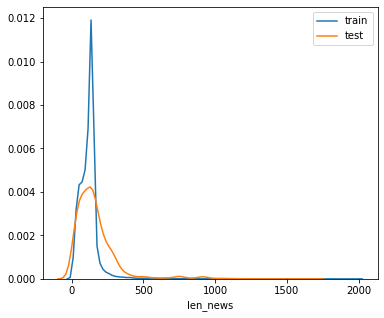

In [171]:
polt_distribution(df,key='len_news')

### 5. 评论最长的长度分布

test 评论普遍较短.

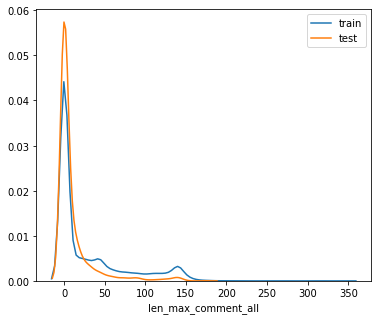

In [155]:
polt_distribution(df,key='len_max_comment_all')

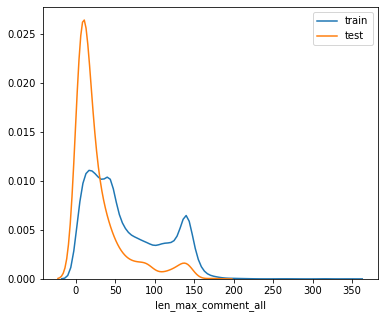

In [158]:
# 剔除无评论 后的评论长度数据分布 
polt_distribution(df,key='len_max_comment_all',drop_zero=True)

### 6. 评论 2条时 中最长的长度分布


- train 无数据, 
- test 中 62 % 的新闻不存在 缺失

In [166]:
(df[df.type =='test']['len_max_comment_2'].value_counts()/len(df[df.type =='test'])).to_frame().head().T

,0,4,9,6,10
len_max_comment_2,0.622895,0.025889,0.017779,0.016843,0.016843


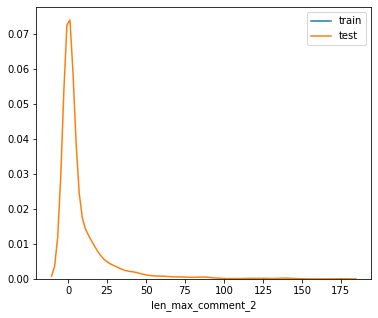

In [162]:
polt_distribution(df,key='len_max_comment_2')

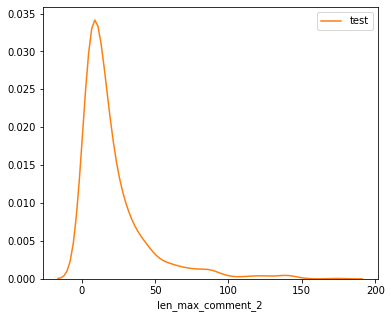

In [163]:
# 剔除无评论 后的评论长度数据分布 
polt_distribution(df,key='len_max_comment_2',drop_zero=True)

### 7. 评论条数的长度分布

test 评论普遍较短.

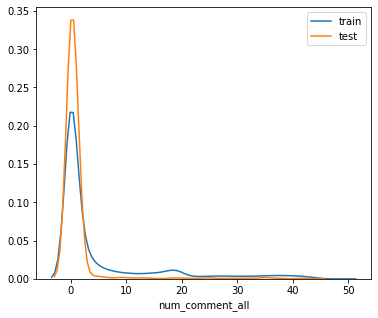

In [159]:
polt_distribution(df,key='num_comment_all')

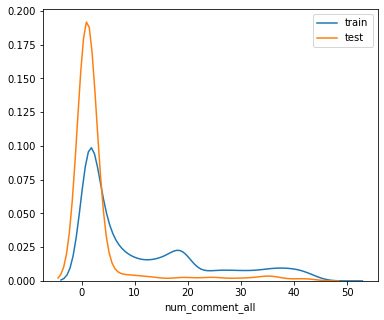

In [160]:
# 剔除无评论 后的评论条数数据分布 
polt_distribution(df,key='num_comment_all',drop_zero=True)

### 8. 图片数量分布

但从帖子的配图来看, train 和 test 有明显不一致,主要在配图数量为1 的占比上.
test 上大部分 **86.8%** 都没有配图.

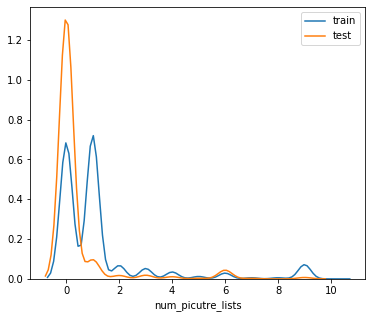

In [150]:
polt_distribution(df,key='num_picutre_lists')

#### 从提供的 图片数据来看:

In [170]:
print('训练集图片数:',len(os.listdir('./data/train_images/')))
print('测试集图片数:',len(os.listdir('./data/test_images/')))

训练集图片数: 61432
测试集图片数: 1236


大致看了下,测试集图片,有以下发现"
- 1.  `药袋哥` 的出镜率很高,不知是何意
- 2. 测试集中 内容重复图片较多

药袋哥新闻:(新闻里的图片,基本都在测试集中)

http://www.chinanews.com/gn/2020/03-07/9116912.shtml